# Install libraries

In [2]:
pip install pingouin

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Core analysis packages
import numpy as np
import pingouin as pg
import os, sys
import pandas as pd
from scipy import stats
from scipy.special import comb
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import anova
import matplotlib.pyplot as plt

# import bff 
#Plotting packages
import matplotlib.pyplot as plt
plt.rcdefaults()
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.set_style("white")
sns.set_style({'xtick.bottom': True, 'ytick.left': True})
colorref = ["gray", "royalblue", "crimson", "goldenrod", "mediumorchid", "seagreen"]

from patsy import dmatrices

#import researchpy - not sure what this is either- just dont have the right environment

# iPython magic commands
%matplotlib notebook
%load_ext autoreload
%autoreload 2
%autosave 30

SMALL_SIZE = 12
MEDIUM_SIZE = 12
BIG_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIG_SIZE)  # fontsize of the figure title
cust_palette = sns.color_palette("Paired")[6:10]
cust_palette = [cust_palette[i] for i in [1,0,3,2]]

def median_split(S):
    return S > S.median()

/Users/katiemason/anaconda3/lib/python3.11/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


Autosaving every 30 seconds


# Point estimates for condition effect retrieved from lmer models in R

In [95]:
# Import the belief point estimates

belief_est = pd.read_csv("All_Cond_Estimates_Belief_Stand.csv")

# Sort by descending

belief_est = belief_est.sort_values(by=['est.'], ascending=False)
belief_est

,Country,lower,est.,upper
0,USA,0.145422,0.198311,0.251200
3,Canada,0.000331,0.184538,0.368745
10,Netherlands,0.055540,0.176216,0.296891
2,Brazil,-0.021217,0.122158,0.265534
7,Israel,-0.037396,0.097678,0.232752
9,Japan,-0.061975,0.066256,0.194486
11,Nigeria,-0.079456,0.061865,0.203187
4,Chile,-0.216296,0.036831,0.289958
8,Italy,-0.113379,0.035430,0.184238
12,Poland,-0.078884,0.032716,0.144315


<IPython.core.display.Javascript object>


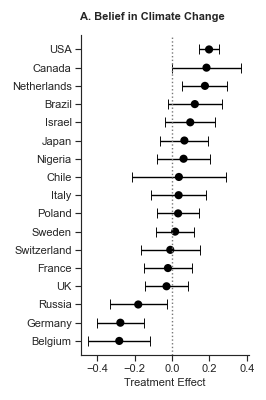

In [97]:
# Point plot using estimates + CIs from lmer models.

pal = ["Black"]
fig, ax = plt.subplots(1, 1, figsize=(4, 6))

sns.pointplot(y=belief_est["Country"], x=belief_est["est."], orient="h", palette=pal, join=False, capsize=0.4, ax=ax)

plt.errorbar(x=belief_est["est."], y=belief_est["Country"], xerr=[belief_est["est."] - belief_est["lower"], belief_est["upper"] - belief_est["est."]], fmt='none', markersize=8, capsize=5, color='black')
plt.xlabel("Treatment Effect")
plt.ylabel("")

plt.title("A. Belief in Climate Change", fontweight='bold', y=1.03, x = .43, fontsize=12)  

ax.xaxis.grid(False)
ax.yaxis.grid(False)

sns.despine()
plt.axvline(x=0, c="#777777", ls=":")

plt.tight_layout()

plt.show()

# plt.savefig('Belief_PointEst_Country.pdf', dpi=300, format="pdf", bbox_inches='tight')


In [98]:
# Belief with ideology included 

Lib_Con_Belief = pd.read_csv("Lib_Con_Belief_Stand.csv")
Lib_Con_Belief

# Lib_Con_Belief = Lib_Con_Belief.sort_values(by=['est.'], ascending=False)
# Lib_Con_Belief

,Country,Ideology,lower,est.,upper
0,USA,Liberal,0.126435,0.210650,0.294865
1,USA,Conservative,0.112699,0.185972,0.259245
2,Canada,Liberal,-0.055704,0.167403,0.390510
3,Canada,Conservative,-0.174633,0.201674,0.577980
4,Netherlands,Liberal,-0.155021,0.035222,0.225464
5,Netherlands,Conservative,0.090658,0.317210,0.543762
6,Brazil,Liberal,-0.054401,0.178692,0.411786
7,Brazil,Conservative,-0.105223,0.065624,0.236472
8,Israel,Liberal,-0.391005,-0.162511,0.065983
9,Israel,Conservative,0.153122,0.357867,0.562612


<IPython.core.display.Javascript object>


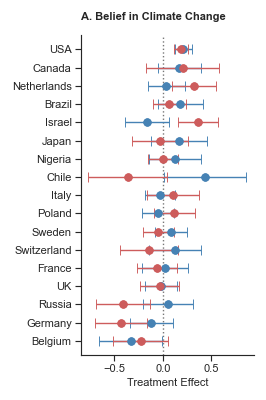

In [100]:
# Point plot using exact estimates + CIs from lmer models. Includes ideology.

# Colors for liberals and conservatives 
palette = {'Liberal':'#4682B4' , 'Conservative': '#CD5C5C'}

# Create figure 
fig, ax = plt.subplots(1, 1, figsize=(4, 6))

# Make point plot
sns.pointplot(
    y=Lib_Con_Belief["Country"],
    x=Lib_Con_Belief["est."],
    hue=Lib_Con_Belief["Ideology"],
    orient="h",
    palette=palette,
    join=False,
    capsize=0.4,
    ax=ax
)

# Label plot 
plt.xlabel("Treatment Effect")
plt.ylabel("")

plt.title("A. Belief in Climate Change", fontweight='bold', y=1.03, x = .42, fontsize=12)  

# Turn off grid lines
ax.xaxis.grid(False)
ax.yaxis.grid(False)

sns.despine()

plt.axvline(x=0, c="#777777", ls=":")

# Adding error bars using a loop such that red is conservative and blue is liberal
for i, row in Lib_Con_Belief.iterrows(): # For each row of the data frame 
    x = row["est."]
    y = row["Country"]
    lower = row["lower"]
    upper = row["upper"]
    ideology = row["Ideology"]
    color = palette[ideology] # Use color based on ideology

    plt.errorbar(
        x=x,
        y=y,
        xerr=[[x - lower], [upper - x]],
        fmt='o',
        markersize=8,
        capsize=5,
        color=color
    )

# Remove legend
ax.get_legend().remove()

plt.tight_layout()
plt.show()

# plt.savefig('Belief_PointEst_Country_Ide.pdf', dpi=900, format="pdf")


In [101]:
# Import the policy point estimates

policy_est = pd.read_csv("All_Cond_Estimates_Policy_Stand.csv")

# Sort by descending

policy_est = policy_est.sort_values(by=['est'], ascending=False)
policy_est

,Country,lower,est,upper
2,Brazil,0.084027,0.177768,0.271509
0,USA,0.088396,0.122380,0.156365
7,Israel,-0.013182,0.075208,0.163598
14,Sweden,-0.002779,0.061716,0.126211
12,Poland,-0.009852,0.061639,0.133129
8,Italy,-0.053468,0.041336,0.136140
10,Netherlands,-0.038752,0.038346,0.115444
11,Nigeria,-0.070763,0.022038,0.114839
3,Canada,-0.104106,0.013132,0.130370
16,UK,-0.061358,0.011251,0.083860


<IPython.core.display.Javascript object>


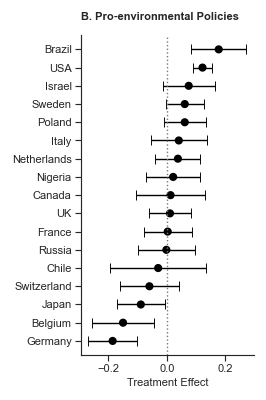

In [102]:
# Point plot using estimates + CIs from lmer models.

pal = ["Black"]
fig, ax = plt.subplots(1, 1, figsize=(4, 6))

sns.pointplot(y=policy_est["Country"], x=policy_est["est"], orient="h", palette=pal, join=False, capsize=0.4, ax=ax)

plt.errorbar(x=policy_est["est"], y=policy_est["Country"], xerr=[policy_est["est"] - policy_est["lower"], policy_est["upper"] - policy_est["est"]], fmt='none', markersize=8, capsize=5, color = 'black')
plt.xlabel("Treatment Effect")
plt.ylabel("")

plt.title("B. Pro-environmental Policies", fontweight='bold', y=1.03, x = .46, fontsize=12)  

ax.xaxis.grid(False)
ax.yaxis.grid(False)

sns.despine()
plt.axvline(x=0, c="#777777", ls=":")

plt.tight_layout()

plt.show()

# plt.savefig('Policy_PointEst_Country.pdf', dpi=300, format="pdf", bbox_inches='tight')


In [103]:
# Policy with ideology included 

Lib_Con_Policy = pd.read_csv("Lib_Con_Policy_Stand.csv")
Lib_Con_Policy

,Country,Ideology,lower,est.,upper
0,Brazil,Liberal,0.049461,0.201468,0.353475
1,Brazil,Conservative,0.040706,0.154067,0.267429
2,USA,Liberal,0.091447,0.145505,0.199563
3,USA,Conservative,0.052199,0.099256,0.146313
4,Israel,Liberal,-0.183061,-0.033031,0.116999
5,Israel,Conservative,0.049964,0.183447,0.316930
6,Sweden,Liberal,-0.036693,0.070719,0.178131
7,Sweden,Conservative,-0.048343,0.052713,0.153769
8,Poland,Liberal,-0.036634,0.071026,0.178687
9,Poland,Conservative,-0.081419,0.052251,0.185921


<IPython.core.display.Javascript object>


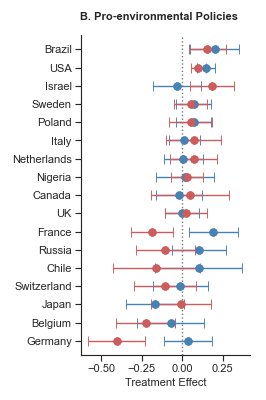

In [104]:
# Point plot using exact estimates + CIs from lmer models. Includes ideology.

# Colors for liberals and conservatives 
palette = {'Liberal':'#4682B4' , 'Conservative': '#CD5C5C'}

# Create figure 
fig, ax = plt.subplots(1, 1, figsize=(4, 6))

# Make point plot
sns.pointplot(
    y=Lib_Con_Policy["Country"],
    x=Lib_Con_Policy["est."],
    hue=Lib_Con_Policy["Ideology"],
    orient="h",
    palette=palette,
    join=False,
    capsize=0.4,
    ax=ax
)

# Label plot 
plt.xlabel("Treatment Effect")
plt.ylabel("")

plt.title("B. Pro-environmental Policies", fontweight='bold', y=1.03, x = .46, fontsize=12)  

# Turn off grid lines
ax.xaxis.grid(False)
ax.yaxis.grid(False)

sns.despine()

plt.axvline(x=0, c="#777777", ls=":")

# Adding error bars using a loop such that red is conservative and blue is liberal
for i, row in Lib_Con_Policy.iterrows(): # For each row of the data frame 
    x = row["est."]
    y = row["Country"]
    lower = row["lower"]
    upper = row["upper"]
    ideology = row["Ideology"]
    color = palette[ideology] # Use color based on ideology

    plt.errorbar(
        x=x,
        y=y,
        xerr=[[x - lower], [upper - x]],
        fmt='o',
        markersize=8,
        capsize=5,
        color=color
    )

# Remove legend
ax.get_legend().remove()

plt.tight_layout()
plt.show()

# plt.savefig('Policy_PointEst_Country_Ide.pdf', dpi=900, format="pdf")


In [27]:
# Import the sharing point estimates

share_est = pd.read_csv("All_Cond_Estimates_Share_Stand.csv")

# Sort by descending

share_est = share_est.sort_values(by=['est'], ascending=False)
share_est

,country,lower,est,upper,stand_lower,stand,stand_upper
2,Brazil,0.650156,1.474618,2.417785,0.176414,0.376576,0.554603
10,Netherlands,-0.281127,0.515912,1.331653,-0.077265,0.140802,0.344604
9,Japan,-0.521240,0.452565,1.482689,-0.142227,0.123796,0.378342
0,USA,0.108292,0.379875,0.652407,0.029839,0.104149,0.177006
4,Chile,-1.045100,0.376620,1.900533,-0.276837,0.103266,0.464076
3,Canada,-0.662268,0.367189,1.451001,-0.179595,0.100706,0.371382
15,Switzerland,-0.631123,0.347275,1.339774,-0.171404,0.095296,0.346454
13,Russia,-0.661871,0.292733,1.241796,-0.179491,0.080435,0.323869
7,Israel,-0.753868,0.160949,1.075846,-0.203467,0.044324,0.284332
5,France,-0.522033,0.154932,0.831635,-0.142439,0.042670,0.223455


<IPython.core.display.Javascript object>


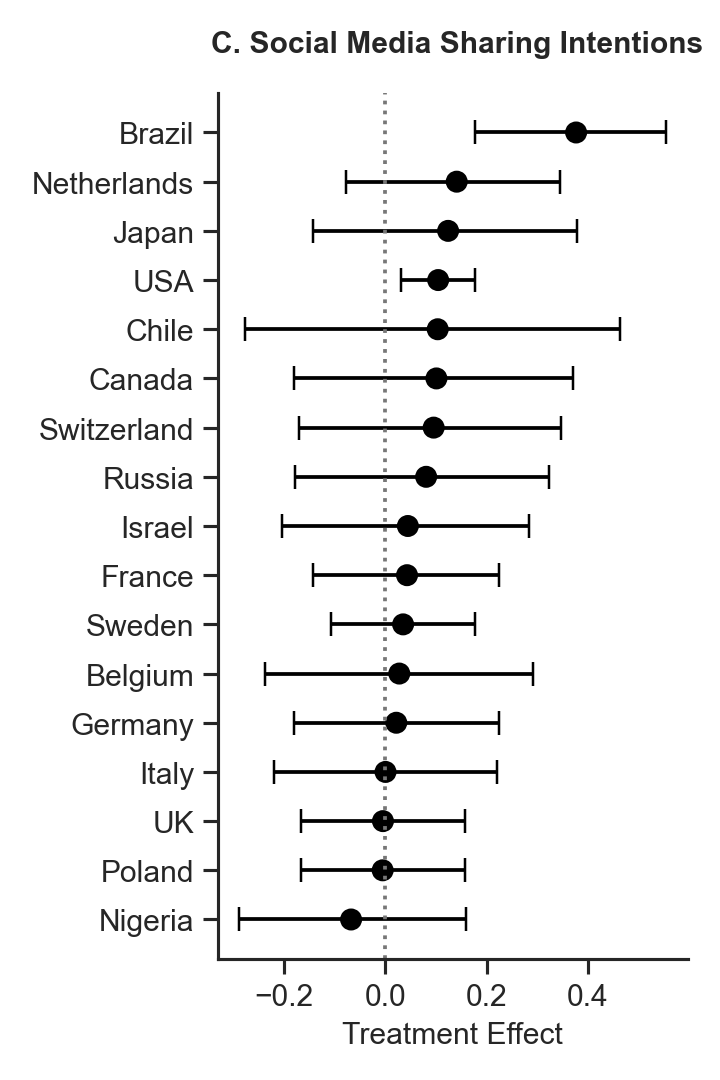

In [37]:
# Point plot using estimates + CIs from lmer models.

pal = ["Black"]
fig, ax = plt.subplots(1, 1, figsize=(4, 6))

sns.pointplot(y=share_est["country"], x=share_est["stand"], orient="h", palette=pal, join=False, capsize=0.4, ax=ax)

plt.errorbar(x=share_est["stand"], y=share_est["country"], xerr=[share_est["stand"] - share_est["stand_lower"], share_est["stand_upper"] - share_est["stand"]], fmt='none', markersize=8, capsize=5, color = 'black')
plt.xlabel("Treatment Effect")
plt.ylabel("")

plt.title("C. Social Media Sharing Intentions", fontweight='bold',  y=1.03, x = .51, fontsize=12)

ax.xaxis.grid(False)
ax.yaxis.grid(False)

sns.despine()
plt.axvline(x=0, c="#777777", ls=":")

plt.tight_layout()

plt.show()

# plt.savefig('Share_PointEst_Country.pdf', dpi=900, format="pdf", bbox_inches='tight')

In [19]:
# Import the action point estimates

action_est = pd.read_csv("All_Cond_Estimates_Action_Stand.csv")
action_est

# Sort by descending

action_est = action_est.sort_values(by=['est'], ascending=False)
action_est

,country,lower,est,upper
5,France,0.142949,0.407245,0.671541
11,Nigeria,-0.113265,0.180279,0.473823
13,Russia,-0.164447,0.150229,0.464905
14,Sweden,-0.124715,0.084122,0.292959
8,Italy,-0.286933,0.022162,0.331257
16,UK,-0.234396,0.002507,0.239409
0,USA,-0.170063,-0.060270,0.049524
6,Germany,-0.323798,-0.060932,0.201934
1,Belgium,-0.429587,-0.083708,0.262172
12,Poland,-0.315125,-0.083836,0.147454


<IPython.core.display.Javascript object>


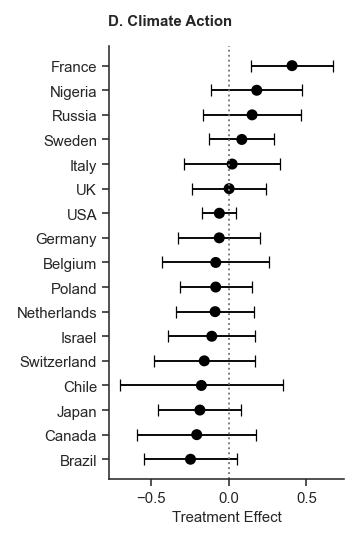

In [20]:
# Point plot using estimates + CIs from lmer models.

pal = ["Black"]
fig, ax = plt.subplots(1, 1, figsize=(4, 6))

sns.pointplot(y=action_est["country"], x=action_est["est"], orient="h", palette=pal, join=False, capsize=0.4, ax=ax)

plt.errorbar(x=action_est["est"], y=action_est["country"], xerr=[action_est["est"] - action_est["lower"], action_est["upper"] - action_est["est"]], fmt='none', markersize=8, capsize=5, color = 'black')
plt.xlabel("Treatment Effect")
plt.ylabel("")

plt.title("D. Climate Action", fontweight='bold', y=1.03, x = .26, fontsize=12)

# Turn off grid lines
ax.xaxis.grid(False)
ax.yaxis.grid(False)

sns.despine()
plt.axvline(x=0, c="#777777", ls=":")

plt.tight_layout()

plt.show()

# plt.savefig('Action_PointEst_Country.pdf', dpi=900, format="pdf", bbox_inches='tight')
# 

# Suplement: Plotting ideology estimates for each country on each DV 

In [112]:
# Import the belief point estimates

Belief_Ide = pd.read_excel("Belief_Ide.xlsx")

# Sort by descending

Belief_Ide = Belief_Ide.sort_values(by=['est.'], ascending=False)
Belief_Ide

,country,lower,est.,upper
11,Nigeria,-0.000493,0.066585,0.133664
13,Russia,-0.063261,0.024936,0.113133
9,Japan,-0.083849,0.018459,0.120767
2,Brazil,-0.057869,-0.000144,0.057581
1,Belgium,-0.166390,-0.065522,0.035346
8,Italy,-0.236278,-0.172778,-0.109278
12,Poland,-0.250301,-0.189716,-0.129130
5,France,-0.263990,-0.192923,-0.121856
6,Germany,-0.286664,-0.202848,-0.119031
14,Sweden,-0.274785,-0.224093,-0.173402


<IPython.core.display.Javascript object>


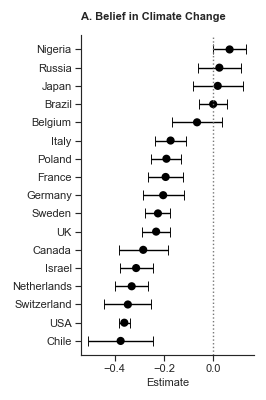

In [118]:
# Point plot using estimates + CIs from lmer models.

pal = ["Black"]
fig, ax = plt.subplots(1, 1, figsize=(4, 6))

sns.pointplot(y=Belief_Ide["country"], x=Belief_Ide["est."], orient="h", palette=pal, join=False, capsize=0.4, ax=ax)

plt.errorbar(x=Belief_Ide["est."], y=Belief_Ide["country"], xerr=[Belief_Ide["est."] - Belief_Ide["lower"], Belief_Ide["upper"] - Belief_Ide["est."]], fmt='none', markersize=8, capsize=5, color = 'black')
plt.xlabel("Estimate")
plt.ylabel("")

plt.title("A. Belief in Climate Change", fontweight='bold',  y=1.03, x = .42, fontsize=12)

# Turn off grid lines
ax.xaxis.grid(False)
ax.yaxis.grid(False)

sns.despine()
plt.axvline(x=0, c="#777777", ls=":")

plt.tight_layout()

plt.show()

# plt.savefig('Belief_Ide.pdf', dpi=900, format="pdf")


In [119]:
# Import the policy point estimates

Policy_Ide = pd.read_exce("Policy_Ide.xlsx")

# Sort by descending

Policy_Ide = Policy_Ide.sort_values(by=['est.'], ascending=False)
Policy_Ide

,country,lower,est.,upper
11,Nigeria,0.066438,0.110669,0.154901
9,Japan,-0.060613,0.004377,0.069367
13,Russia,-0.069093,-0.011582,0.045928
1,Belgium,-0.095392,-0.030892,0.033608
2,Brazil,-0.073914,-0.035907,0.002100
12,Poland,-0.128202,-0.089228,-0.050253
5,France,-0.145467,-0.099963,-0.054460
8,Italy,-0.174274,-0.133841,-0.093409
16,UK,-0.202699,-0.165683,-0.128667
7,Israel,-0.213580,-0.169442,-0.125305


<IPython.core.display.Javascript object>


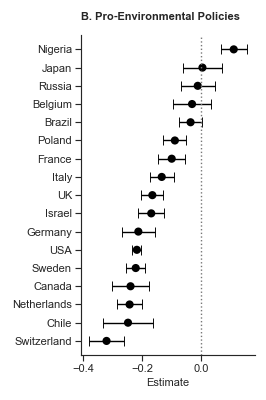

In [121]:
# Point plot using estimates + CIs from lmer models.

pal = ["Black"]
fig, ax = plt.subplots(1, 1, figsize=(4, 6))

sns.pointplot(y=Policy_Ide["country"], x=Policy_Ide["est."], orient="h", palette=pal, join=False, capsize=0.4, ax=ax)

plt.errorbar(x=Policy_Ide["est."], y=Policy_Ide["country"], xerr=[Policy_Ide["est."] - Policy_Ide["lower"], Policy_Ide["upper"] - Policy_Ide["est."]], fmt='none', markersize=8, capsize=5, color = 'black')
plt.xlabel("Estimate")
plt.ylabel("")
plt.title("B. Pro-Environmental Policies", fontweight='bold',  y=1.03, x = .46, fontsize=12)

# Turn off grid lines
ax.xaxis.grid(False)
ax.yaxis.grid(False)

sns.despine()
plt.axvline(x=0, c="#777777", ls=":")

plt.tight_layout()

plt.show()

# plt.savefig('Policy_Ide.pdf', dpi=900, format="pdf")

In [34]:
# Import the sharing point estimates

Share_Ide = pd.read_csv("Share_Ide.csv")

# Sort by descending

Share_Ide = Share_Ide.sort_values(by=['est'], ascending=False)
Share_Ide

,country,lower,est,upper,stand_lower,stand,stand_upper
1,Belgium,0.346417,0.995864,1.753001,0.095062,0.264730,0.435101
3,Canada,0.212687,0.793955,1.479009,0.058530,0.213804,0.377537
7,Israel,0.097746,0.536294,1.009497,0.026935,0.146248,0.268095
16,UK,0.095389,0.416729,0.753118,0.026286,0.114127,0.203273
6,Germany,-0.089261,0.381778,0.877921,-0.024599,0.104665,0.235221
8,Italy,0.020911,0.360461,0.711935,0.005764,0.098879,0.192581
11,Nigeria,-0.129713,0.286097,0.703298,-0.035734,0.078623,0.190330
14,Sweden,-0.183136,0.084700,0.354934,-0.050420,0.023342,0.097378
10,Netherlands,-0.409872,0.017689,0.449437,-0.112273,0.004876,0.122954
13,Russia,-0.575358,0.013377,0.574936,-0.156648,0.003688,0.156536


<IPython.core.display.Javascript object>


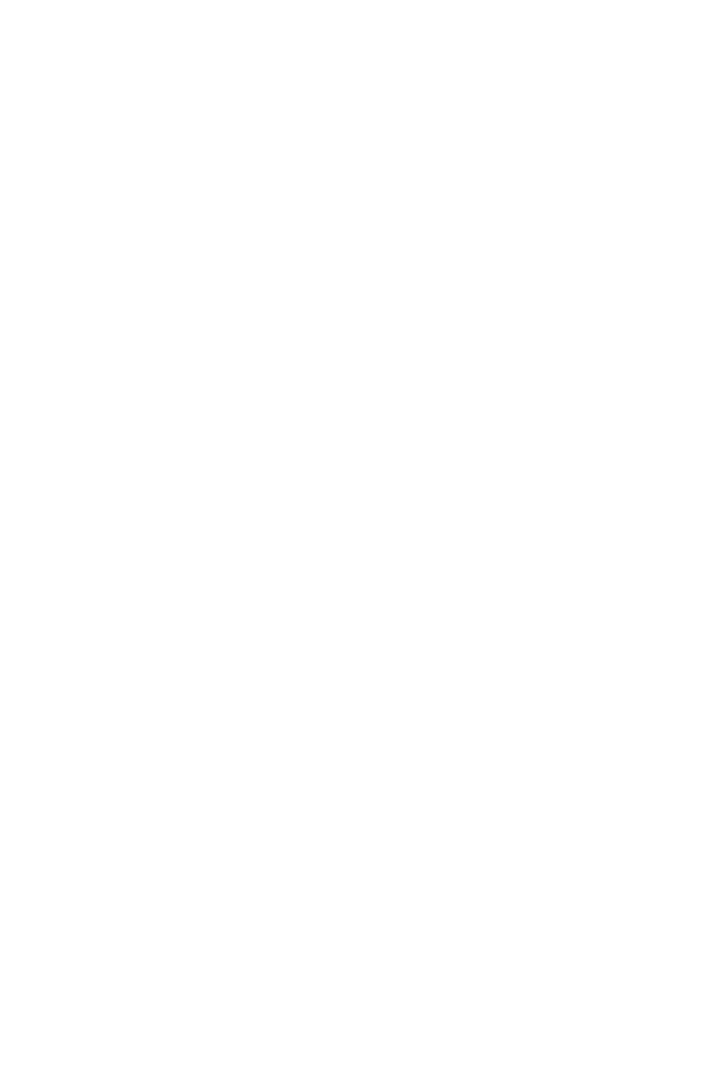

In [38]:
# Point plot using estimates + CIs from lmer models.

pal = ["Black"]
fig, ax = plt.subplots(1, 1, figsize=(4, 6))

sns.pointplot(y=Share_Ide["country"], x=Share_Ide["est"], orient="h", palette=pal, join=False, capsize=0.4, ax=ax)

plt.errorbar(x=Share_Ide["est"], y=Share_Ide["country"], xerr=[Share_Ide["est"] - Share_Ide["lower"], Share_Ide["upper"] - Share_Ide["est"]], fmt='none', markersize=8, capsize=5, color = 'black')
plt.xlabel("Estimate")
plt.ylabel("")
plt.title("C. Social Media Sharing Intentions", fontweight='bold',  y=1.03, x = .521, fontsize=12)

# Turn off grid lines
ax.xaxis.grid(False)
ax.yaxis.grid(False)

sns.despine()
plt.axvline(x=0, c="#777777", ls=":")

plt.tight_layout()

plt.show()

# plt.savefig('Share_Ide.pdf', dpi=900, format="pdf")

In [22]:
# Import the action point estimates

Action_Ide = pd.read_csv("Action_Ide.csv")

# Sort by descending

Action_Ide = Action_Ide.sort_values(by=['est'], ascending=False)
Action_Ide

,country,lower,est,upper
5,France,0.055678,0.560736,1.065794
9,Japan,-0.464613,0.262486,0.989584
2,Brazil,-0.164706,0.245191,0.655089
12,Poland,-0.202017,0.227493,0.657003
16,UK,-0.227807,0.185023,0.597852
0,USA,-0.107060,0.058464,0.223989
15,Switzerland,-0.649026,0.027954,0.704935
11,Nigeria,-0.467193,0.009530,0.486254
1,Belgium,-0.877218,-0.160348,0.556522
7,Israel,-0.733639,-0.254562,0.224515


<IPython.core.display.Javascript object>


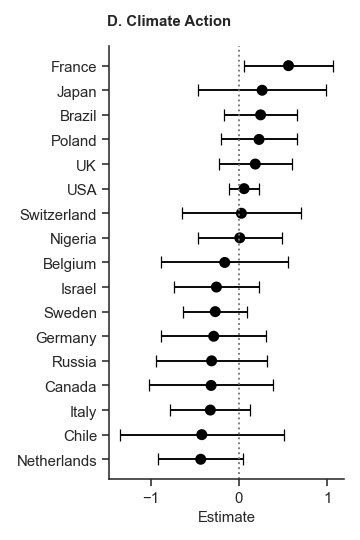

In [26]:
# Point plot using estimates + CIs from lmer models.

pal = ["Black"]
fig, ax = plt.subplots(1, 1, figsize=(4, 6))

sns.pointplot(y=Action_Ide["country"], x=Action_Ide["est"], orient="h", palette=pal, join=False, capsize=0.4, ax=ax)

plt.errorbar(x=Action_Ide["est"], y=Action_Ide["country"], xerr=[Action_Ide["est"] - Action_Ide["lower"], Action_Ide["upper"] - Action_Ide["est"]], fmt='none', markersize=8, capsize=5, color = 'black')
plt.xlabel("Estimate")
plt.ylabel("")
plt.title("D. Climate Action", fontweight='bold',  y=1.03, x = .255, fontsize=12)

# Turn off grid lines
ax.xaxis.grid(False)
ax.yaxis.grid(False)

sns.despine()
plt.axvline(x=0, c="#777777", ls=":")

plt.tight_layout()

plt.show()

# plt.savefig('Action_Ide.pdf', dpi=900, format="pdf")

# Intervention comparison: 63 country sample

In [5]:
# Data set with all countries and all interventions 

df = pd.read_csv("data63_ALL_CONDS.csv")
df

,StartDate,EndDate,ResponseId,Country,cond,condName,WEPTcc,BELIEFcc,POLICYcc,SHAREcc,...,Age,Politics2_1,Politics2_9,Edu,Income,Indirect_SES,MacArthur_SES,PerceivedSciConsensu_1,Intro_Timer,condition_time_total
0,2/9/23 1:55,2/9/23 2:01,R_1r7Yr7R1xMimIvj,usa,5,CollectAction,1,88.50,89.000000,1.0,...,35.0,97.0,89.0,3.0,5.0,"2,4,5",7.0,80.0,6.056,95.501
1,2/9/23 12:33,2/9/23 12:43,R_2ATgV5VxewrTRiI,usa,1,Control,0,50.25,66.222222,0.0,...,39.0,87.0,72.0,3.0,4.0,"1,2,3,4,5,6,7",5.0,51.0,16.284,200.742
2,2/9/23 12:34,2/9/23 12:43,R_3ENlePBlLyYjExr,usa,9,LetterFutureGen,1,84.00,84.222222,1.0,...,55.0,13.0,40.0,3.0,5.0,"1,2,3,6,7",8.0,73.0,5.701,218.442
3,2/9/23 12:35,2/9/23 12:43,R_2c0HQgvYzas6mus,usa,4,SciConsens,0,0.50,1.222222,0.0,...,66.0,100.0,100.0,3.0,5.0,"1,2,3,4,5,6,7",4.0,1.0,13.282,12.702
4,2/9/23 12:33,2/9/23 12:44,R_00siryCwgdMus6J,usa,8,PluralIgnorance,0,57.50,80.222222,0.0,...,53.0,46.0,51.0,3.0,5.0,"1,3,5,6,7",7.0,65.0,8.474,19.315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59435,14/12/2022 06:31,14/12/2022 06:59,R_2TuXye2HP6EO5KZ,vietnam,11,FutureSelfCont,0,80.75,82.500000,0.0,...,24.0,77.0,0.0,3.0,2.0,"1,2,3,4,5,6,7",7.0,60.0,27.732,873.538
59436,14/12/2022 07:57,14/12/2022 08:14,R_3R3p8C0gzLKTcCu,vietnam,12,BindingMoral,0,96.50,86.444444,1.0,...,19.0,89.0,73.0,3.0,2.0,"1,2,4,6,7",3.0,74.0,49.502,0.000
59437,14/12/2022 07:57,14/12/2022 08:22,R_OeT1JV3yC1aJ4EF,vietnam,8,PluralIgnorance,7,100.00,83.333333,1.0,...,28.0,41.0,41.0,3.0,1.0,"2,4,5,6,7",6.0,100.0,7.920,89.072
59438,14/12/2022 08:45,14/12/2022 09:15,R_2azVf0KXD3rtly8,vietnam,3,NegativeEmotions,8,64.75,66.666667,1.0,...,20.0,50.0,50.0,3.0,NaN,"1,2,3,4,5,6,7",7.0,100.0,40.222,398.193


<IPython.core.display.Javascript object>


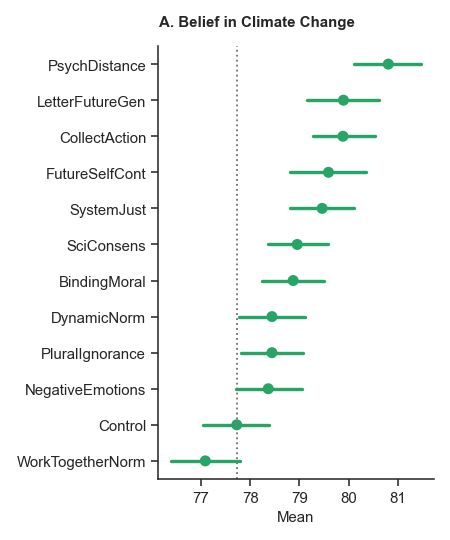

/var/folders/f7/6tg30kcj42n67psm__s7kxr80000gn/T/ipykernel_66041/1150734422.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order = df.groupby("condName").agg("mean")["BELIEFcc"].sort_values(ascending=False).index


In [6]:
# Belief, 63 country sample

pal = ["#27a567"]

fig, ax = plt.subplots(1, 1, figsize=(5, 6))

order = df.groupby("condName").agg("mean")["BELIEFcc"].sort_values(ascending=False).index
sns.pointplot(y=df.condName, x=df.BELIEFcc, data=df, orient="h", \
            palette=pal, join=False, \
            order= order, ax=ax)
sns.despine()
plt.axvline(df.loc[df.condName=="Control", "BELIEFcc"].mean(), c="#777777", ls=":") # dotted line at control condtion

ax.set_ylabel("")
ax.set_xlabel("Mean")

plt.title("A. Belief in Climate Change", fontweight='bold', y=1.03, x = .36, fontsize=12)  

plt.tight_layout()

# plt.savefig('belief_compare_63.pdf', dpi=900, format="pdf")

<IPython.core.display.Javascript object>


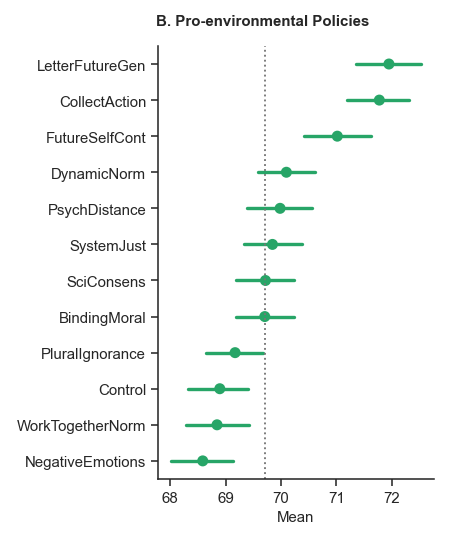

/var/folders/f7/6tg30kcj42n67psm__s7kxr80000gn/T/ipykernel_66041/635591824.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order = df.groupby("condName").agg("mean")["POLICYcc"].sort_values(ascending=False).index


In [7]:
# Policy, 63 country sample

pal = ["#27a567"]

fig, ax = plt.subplots(1, 1, figsize=(5, 6))

order = df.groupby("condName").agg("mean")["POLICYcc"].sort_values(ascending=False).index
sns.pointplot(y=df.condName, x=df.POLICYcc, data=df, orient="h", \
            palette=pal, join=False, \
            order= order, ax=ax)
sns.despine()
plt.axvline(df.loc[df.condName=="BindingMoral", "POLICYcc"].mean(), c="#777777", ls=":") # dotted line at control condtion

ax.set_ylabel("")
ax.set_xlabel("Mean")

plt.title("B. Pro-environmental Policies", fontweight='bold', y=1.03, x = .38, fontsize=12)  

plt.tight_layout()

# plt.savefig('policy_compare_63.pdf', dpi=900, format="pdf")

<IPython.core.display.Javascript object>


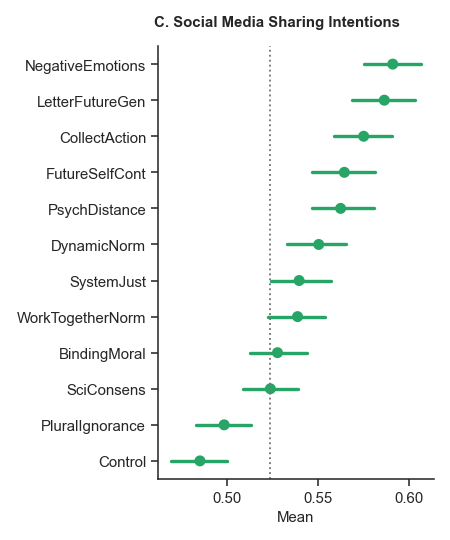

/var/folders/f7/6tg30kcj42n67psm__s7kxr80000gn/T/ipykernel_66041/844601147.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order = df.groupby("condName").agg("mean")["SHAREcc"].sort_values(ascending=False).index


In [8]:
# Sharing, 63 country sample

# For decimals
from matplotlib.ticker import FuncFormatter

pal = ["#27a567"]

fig, ax = plt.subplots(1, 1, figsize=(5, 6))

order = df.groupby("condName").agg("mean")["SHAREcc"].sort_values(ascending=False).index
sns.pointplot(y=df.condName, x=df.SHAREcc, data=df, orient="h", \
            palette=pal, join=False, \
            order= order, ax=ax)
sns.despine()
plt.axvline(df.loc[df.condName=="SciConsens", "SHAREcc"].mean(), c="#777777", ls=":") # dotted line at control condtion

ax.set_ylabel("")
ax.set_xlabel("Mean")

plt.title("C. Social Media Sharing Intentions", fontweight='bold', y=1.03, x = .43, fontsize=12)  

# Formatter function to show only 2 decimal places
formatter = FuncFormatter(lambda x, pos: f'{x:.2f}')
ax.xaxis.set_major_formatter(formatter)

plt.tight_layout()

# plt.savefig('share_compare_63.pdf', dpi=900, format="pdf")

<IPython.core.display.Javascript object>


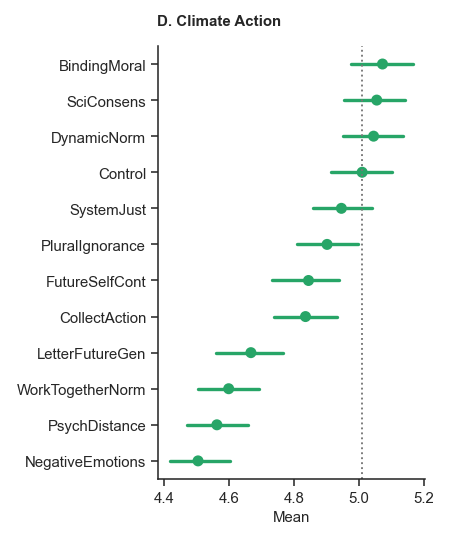

/var/folders/f7/6tg30kcj42n67psm__s7kxr80000gn/T/ipykernel_66041/597501877.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order = df.groupby("condName").agg("mean")["WEPTcc"].sort_values(ascending=False).index


In [9]:
# Action, 63 country sample

pal = ["#27a567"]

fig, ax = plt.subplots(1, 1, figsize=(5, 6))

order = df.groupby("condName").agg("mean")["WEPTcc"].sort_values(ascending=False).index
sns.pointplot(y=df.condName, x=df.WEPTcc, data=df, orient="h", \
            palette=pal, join=False, \
            order= order, ax=ax)
sns.despine()
plt.axvline(df.loc[df.condName=="Control", "WEPTcc"].mean(), c="#777777", ls=":") # dotted line at control condtion

ax.set_ylabel("")
ax.set_xlabel("Mean")

plt.title("D. Climate Action", fontweight='bold', y=1.03, x = .23, fontsize=12)  

plt.tight_layout()

# plt.savefig('action_compare_63.pdf', dpi=900, format="pdf")

# Intervention comparison: US sample

In [10]:
# US data set with all interventions

df_us = df.query('Country=="usa"')
df_us

,StartDate,EndDate,ResponseId,Country,cond,condName,WEPTcc,BELIEFcc,POLICYcc,SHAREcc,...,Age,Politics2_1,Politics2_9,Edu,Income,Indirect_SES,MacArthur_SES,PerceivedSciConsensu_1,Intro_Timer,condition_time_total
0,2/9/23 1:55,2/9/23 2:01,R_1r7Yr7R1xMimIvj,usa,5,CollectAction,1,88.50,89.000000,1.0,...,35.0,97.0,89.0,3.0,5.0,"2,4,5",7.0,80.0,6.056,95.501
1,2/9/23 12:33,2/9/23 12:43,R_2ATgV5VxewrTRiI,usa,1,Control,0,50.25,66.222222,0.0,...,39.0,87.0,72.0,3.0,4.0,"1,2,3,4,5,6,7",5.0,51.0,16.284,200.742
2,2/9/23 12:34,2/9/23 12:43,R_3ENlePBlLyYjExr,usa,9,LetterFutureGen,1,84.00,84.222222,1.0,...,55.0,13.0,40.0,3.0,5.0,"1,2,3,6,7",8.0,73.0,5.701,218.442
3,2/9/23 12:35,2/9/23 12:43,R_2c0HQgvYzas6mus,usa,4,SciConsens,0,0.50,1.222222,0.0,...,66.0,100.0,100.0,3.0,5.0,"1,2,3,4,5,6,7",4.0,1.0,13.282,12.702
4,2/9/23 12:33,2/9/23 12:44,R_00siryCwgdMus6J,usa,8,PluralIgnorance,0,57.50,80.222222,0.0,...,53.0,46.0,51.0,3.0,5.0,"1,3,5,6,7",7.0,65.0,8.474,19.315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58942,9/19/22 17:49,9/19/22 18:01,R_cCLj0LAnqYczGb7,usa,2,WorkTogetherNorm,8,93.00,51.111111,1.0,...,53.0,NaN,NaN,3.0,4.0,"1,3,6,7",3.0,36.0,6.464,153.343
58943,9/20/22 12:47,9/20/22 13:14,R_1FE3QYo8DRAVIZg,usa,7,PsychDistance,0,100.00,91.000000,0.0,...,69.0,100.0,100.0,2.0,4.0,"1,2,3,4,5,6,7",4.0,82.0,17.447,675.849
58944,9/20/22 3:10,9/20/22 18:30,R_6hgIP4tXLT143Wp,usa,6,SystemJust,8,55.25,59.222222,NaN,...,29.0,49.0,51.0,3.0,4.0,"1,2,3,4,5,6,7",4.0,42.0,24.846,163.601
58945,9/20/22 15:07,9/21/22 13:52,R_5ckhmv5C8moy5rP,usa,2,WorkTogetherNorm,0,32.00,48.000000,0.0,...,45.0,44.0,42.0,2.0,NaN,NaN,NaN,NaN,7.028,166.739


<IPython.core.display.Javascript object>


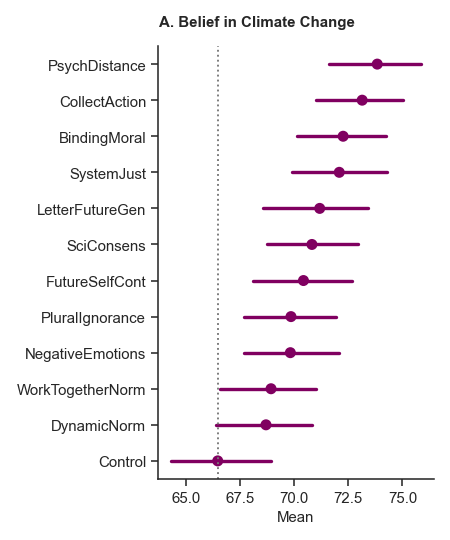

/var/folders/f7/6tg30kcj42n67psm__s7kxr80000gn/T/ipykernel_66041/2863825404.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order = df_us.groupby("condName").agg("mean")["BELIEFcc"].sort_values(ascending=False).index


In [11]:
# Belief, US sample

pal = ["#800060"]

fig, ax = plt.subplots(1, 1, figsize=(5, 6))

order = df_us.groupby("condName").agg("mean")["BELIEFcc"].sort_values(ascending=False).index
sns.pointplot(y=df_us.condName, x=df_us.BELIEFcc, data=df_us, orient="h", \
            palette=pal, join=False, \
            order= order, ax=ax)
sns.despine()
plt.axvline(df_us.loc[df_us.condName=="Control", "BELIEFcc"].mean(), c="#777777", ls=":") # dotted line at control condtion

ax.set_ylabel("")
ax.set_xlabel("Mean")

plt.title("A. Belief in Climate Change", fontweight='bold', y=1.03, x = .36, fontsize=12)  

plt.tight_layout()

# plt.savefig('belief_compare_US.pdf', dpi=900, format="pdf")


<IPython.core.display.Javascript object>


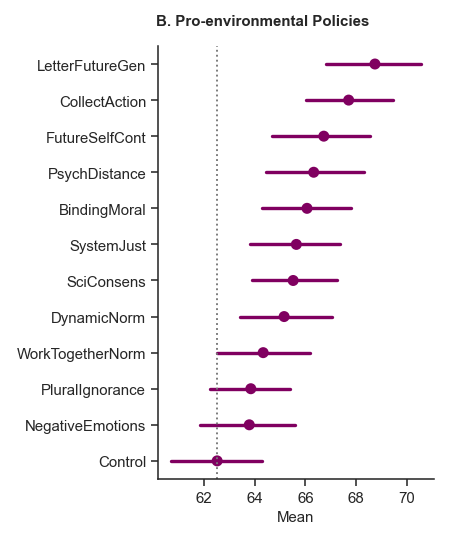

/var/folders/f7/6tg30kcj42n67psm__s7kxr80000gn/T/ipykernel_66041/300699028.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order = df_us.groupby("condName").agg("mean")["POLICYcc"].sort_values(ascending=False).index


In [12]:
# Policy, US sample

pal = ["#800060"]

fig, ax = plt.subplots(1, 1, figsize=(5, 6))

order = df_us.groupby("condName").agg("mean")["POLICYcc"].sort_values(ascending=False).index
sns.pointplot(y=df_us.condName, x=df_us.POLICYcc, data=df_us, orient="h", \
            palette=pal, join=False, \
            order= order, ax=ax)
sns.despine()
plt.axvline(df_us.loc[df_us.condName=="Control", "POLICYcc"].mean(), c="#777777", ls=":") # dotted line at control condtion

ax.set_ylabel("")
ax.set_xlabel("Mean")

plt.title("B. Pro-environmental Policies", fontweight='bold', y=1.03, x = .38, fontsize=12)  

plt.tight_layout()

# plt.savefig('policy_compare_US.pdf', dpi=900, format="pdf")

<IPython.core.display.Javascript object>


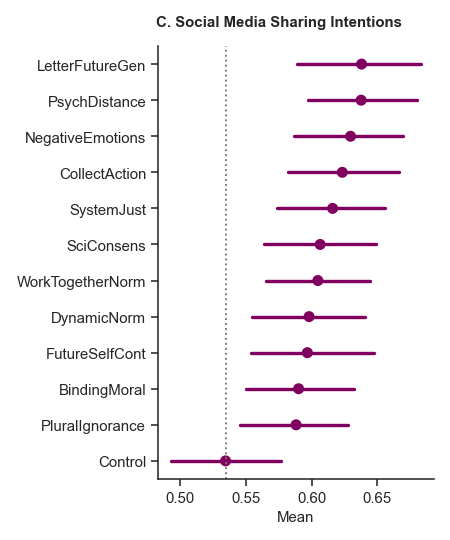

/var/folders/f7/6tg30kcj42n67psm__s7kxr80000gn/T/ipykernel_66041/2898305954.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order = df_us.groupby("condName").agg("mean")["SHAREcc"].sort_values(ascending=False).index


In [13]:
# Sharing, US sample

# For decimals
from matplotlib.ticker import FuncFormatter

pal = ["#800060"]

fig, ax = plt.subplots(1, 1, figsize=(5, 6))

order = df_us.groupby("condName").agg("mean")["SHAREcc"].sort_values(ascending=False).index
sns.pointplot(y=df_us.condName, x=df_us.SHAREcc, data=df_us, orient="h", \
            palette=pal, join=False, \
            order= order, ax=ax)
sns.despine()
plt.axvline(df_us.loc[df_us.condName=="Control", "SHAREcc"].mean(), c="#777777", ls=":") # dotted line at control condtion

ax.set_ylabel("")
ax.set_xlabel("Mean")

plt.title("C. Social Media Sharing Intentions", fontweight='bold', y=1.03, x = .44, fontsize=12)  

# Formatter function to show only 2 decimal places
formatter = FuncFormatter(lambda x, pos: f'{x:.2f}')
ax.xaxis.set_major_formatter(formatter)

plt.tight_layout()

# plt.savefig('share_compare_US.pdf', dpi=900, format="pdf")

<IPython.core.display.Javascript object>


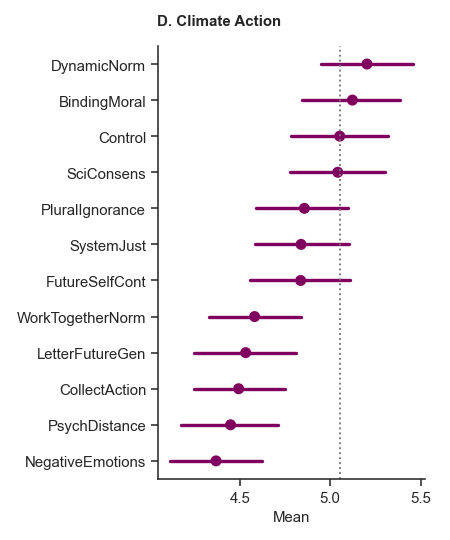

/var/folders/f7/6tg30kcj42n67psm__s7kxr80000gn/T/ipykernel_66041/493695620.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order = df_us.groupby("condName").agg("mean")["WEPTcc"].sort_values(ascending=False).index


In [14]:
# Action, US sample

pal = ["#800060"]

fig, ax = plt.subplots(1, 1, figsize=(5, 6))

order = df_us.groupby("condName").agg("mean")["WEPTcc"].sort_values(ascending=False).index
sns.pointplot(y=df_us.condName, x=df_us.WEPTcc, data=df_us, orient="h", \
            palette=pal, join=False, \
            order= order, ax=ax)
sns.despine()
plt.axvline(df_us.loc[df_us.condName=="Control", "WEPTcc"].mean(), c="#777777", ls=":") # dotted line at control condtion

ax.set_ylabel("")
ax.set_xlabel("Mean")

plt.title("D. Climate Action", fontweight='bold', y=1.03, x = .23, fontsize=12)  

plt.tight_layout()

# plt.savefig('action_compare_US.pdf', dpi=900, format="pdf")